`<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در آخرین گام از پروژه، گزارشی جامع در مورد ویژگی‌های هر منطقه به‌دست می‌آوریم. همچنین با استفاده از زمان انجام معاملات، دو تحلیل بر روی سری‌های زمانی انجام می‌دهیم.
</font> 
</p>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
housing_extended

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3,20.402633,2649.031297
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3,20.402633,2057.976127
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3,12.983181,3100.598461
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3,13.519291,3513.751590



<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| نام ستون | توضیح مقدار |
| :---: | :---: |
| <code dir=ltr>pricePerSquare mean</code> | متوسط قیمت هر متر مربع |
| <code dir=ltr>% houses with elevator</code> | درصد خانه‌هایی که آسانسور دارند |
| <code dir=ltr>% houses with subway</code> | درصد خانه‌هایی که به مترو دسترسی دارند |
| <code dir=ltr>square mean</code> | متوسط متراژ خانه‌ها |
| <code dir=ltr>buildeng age mean</code> | متوسط سال عمر خانه‌ها (عمر هر خانه تا سال ۲۰۲۱ محاسبه می‌شود.) |
| <code dir=ltr>frequent buildingStructure</code> | رایج‌ترین نوع ساختمان |

</font>
</div>
</center>


</font>
</div>
</center>

In [11]:
import statistics
# changing some values and produce age
housing_extended.elevator.replace({'no elevator': 0 , 'has elevator' : 1},inplace=True)
housing_extended.subway.replace({'no subway': 0 , 'has subway' : 1},inplace=True)
housing_extended['age'] = 2021 - housing_extended['constructionTime']
# preparing every column of our data frame
ppsmean = pd.Series(housing_extended.groupby('district').pricePerSquare.mean())
he = pd.Series(housing_extended.groupby('district').elevator.sum()/housing_extended.groupby('district').elevator.count()*100)
se = pd.Series(housing_extended.groupby('district').subway.sum()/housing_extended.groupby('district').subway.count()*100)
smean = pd.Series(housing_extended.groupby('district').square.mean())
amean = pd.Series(housing_extended.groupby('district').age.mean())
fb = pd.Series(housing_extended.groupby('district').buildingStructure.apply(statistics.mode))
# creating dataframe and naming columns
districts_df = pd.DataFrame([ppsmean,he,se,smean,amean,fb]).T
districts_df.columns = ['pricePerSquare mean','% houses with elevator','% houses with subway','square mean','buildeng age mean','frequent buildingStructure']
districts_df

C:\Users\hassan\AppData\Local\Temp\ipykernel_20916\1631633639.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_extended.elevator.replace({'no elevator': 0 , 'has elevator' : 1},inplace=True)
C:\Users\hassan\AppData\Local\Temp\ipykernel_20916\1631633639.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,buildeng age mean,frequent buildingStructure
district,,,,,,
1,5981.774965,56.21655,93.488404,67.047856,25.151709,steel-concrete composite
2,3805.924811,68.647623,61.825544,76.951352,20.639123,steel-concrete composite
3,3130.333142,66.636691,47.032374,92.071484,15.494604,steel-concrete composite
4,2999.928821,39.983398,43.027117,86.322272,18.324364,mixed
5,2841.761483,80.077031,39.005602,89.29799,11.271359,steel-concrete composite
6,2952.222451,37.892663,43.553669,100.121614,17.536464,mixed
7,4225.965657,66.746216,68.307898,78.845544,22.553717,steel-concrete composite
8,5312.914827,51.883462,61.087404,73.615248,24.19157,steel-concrete composite
9,3491.126972,46.534461,27.636823,73.047513,25.653835,steel-concrete composite


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل داده‌ها بر اساس ترتیب زمانی آن‌ها در برخی حوزه‌ها کاربرد بسیاری دارد. به‌عنوان مثال، پیش‌بینی قیمت در بورس، پیش‌بینی قیمت طلا، بررسی حجم فروش اجناس در بازه‌های زمانی مختلف و غیره. زمان انجام معاملات هر خانه در این دیتافریم مشخص شده است و ما می‌توانیم چنین تحلیل‌هایی را نیز بر روی آن انجام دهیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اولین کاری که باید انجام دهیم، تبدیل ستون <code>tradeTime</code> به فرمت زمانی است. برای این‌کار از تابع <code>to_datetime</code> استفاده می‌کنیم.
</font>
</p>

In [12]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])
housing_extended.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare,age
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,...,2005,Simplicity,steel-concrete composite,0.217,1,1,7,14.074996,3167.938931,16
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,...,2004,hardcover,steel-concrete composite,0.667,1,0,7,4.701224,4343.556428,17
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,...,2008,other,steel-concrete composite,0.273,1,0,6,19.293041,2220.149254,13
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,...,1960,rough,mixed,0.333,0,1,1,2.683335,4839.506173,61
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,...,2005,Simplicity,steel-concrete composite,0.333,1,0,7,10.914652,5200.000000,16


C:\Users\hassan\AppData\Local\Temp\ipykernel_20916\232606370.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M', on='tradeTime').mean()


Text(0.5, 1.0, 'pricePerSquare over time')

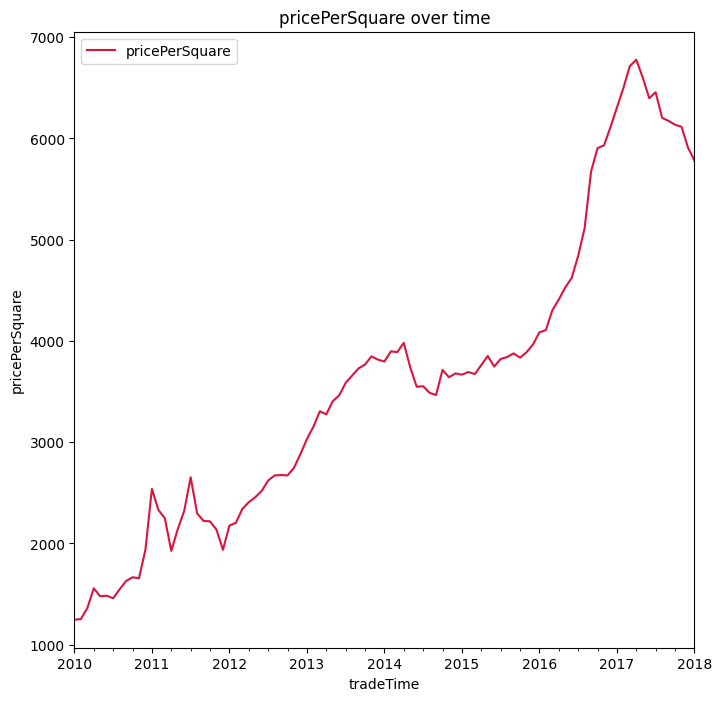

In [13]:
from datetime import datetime
fig1 , ax1 = plt.subplots(figsize = (8,8)) #To-Do
data = housing_extended[['tradeTime', 'pricePerSquare']]

data = data.resample('M', on='tradeTime').mean()

data = data.reset_index()

data = data[ data.tradeTime > '2010']

data.plot(x='tradeTime',y='pricePerSquare',ax=ax1, color='crimson');
ax1.set_ylabel('pricePerSquare')
ax1.set_title('pricePerSquare over time')

C:\Users\hassan\AppData\Local\Temp\ipykernel_20916\4090198539.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  center = center.resample('3M', on='tradeTime')


Text(0, 0.5, 'frequency')

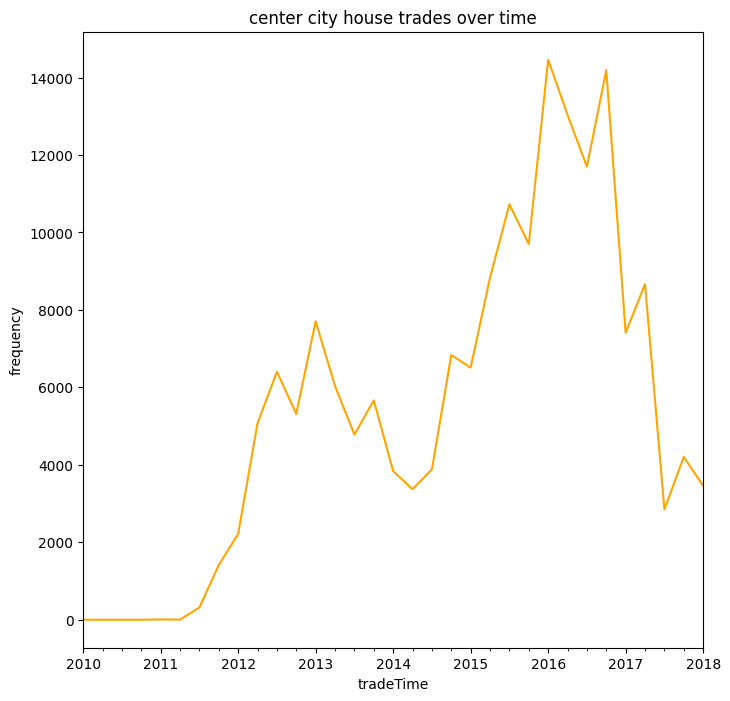

In [14]:
fig2 , ax2 = plt.subplots() # To-Do

fig2.set_size_inches(8, 8)

center = housing_extended[['tradeTime', 'pricePerSquare', 'distanceToCapital']]

center = center[ center.tradeTime > '2010']

center = center.resample('3M', on='tradeTime')


center = center.distanceToCapital.apply(lambda x: (x < 15).sum())

center.plot(ax=ax2, x='tradeTime', y='distanceToCapital', color='orange')

ax2.set_title('center city house trades over time')
ax2.set_ylabel('frequency')